<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Distribui%C3%A7%C3%A3o_de_frequ%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística com Python: Um Guia para Estudos e Solução de Problemas


# **Distribuição de frequência**

**Breve Resumo:**

A distribuição de frequência é uma técnica estatística que organiza e apresenta dados em categorias, exibindo a frequência com que cada categoria ocorre. Essa análise oferece insights sobre a distribuição e padrões de ocorrência de valores em um conjunto de dados, facilitando a compreensão da variabilidade e da tendência central.

**Quando Utilizar:**

- Para visualizar a frequência com que diferentes valores ou faixas ocorrem em um conjunto de dados.
- Ao identificar padrões, outliers ou clusters de valores que podem influenciar a análise.
- Em situações em que a compreensão da variabilidade e da tendência é essencial.
- Para comunicar informações de maneira visual e facilitar a interpretação de dados extensos.
- Em análises exploratórias, permitindo uma compreensão inicial da distribuição dos dados antes de análises mais aprofundadas.

## **Carregando os dados**

Para seguirmos será necessario executar importação de algumas bibliotecas

In [ ]:
# Manipulação de arquivos
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt

# Visualização de dados
import seaborn as sns

# Funções matemáticas
import math

Criando dados ficticios para execução das técnicas de distribuição de frequencia

In [ ]:
# Criando uma tabela primitiva
dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

## **Ordenando os dados**

Rol: Uma lista de todos os valores distintos observados em um conjunto de dados, organizados em ordem crescente.

In [ ]:
# Utilizando o 'sort' para ordenar os dados
dados = np.sort(dados)

In [ ]:
# Observando os dados
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

Obtendo o valor minimo e maximo para utilizar os valores futuramente

In [ ]:
# Pegando o menor valor
minimo = dados.min()

# Pegando o maior valor
maximo = dados.max()

print(f"O menor valor é: {minimo} e o maior valor é: {maximo}")

O menor valor é: 150 e o maior valor é: 173


## **Frequência**

*Frequência:* O número de observações ou ocorrências em cada classe. A fórmula para calcular a frequência é $(f = \text{Número de Observações na Classe})$.

In [ ]:
# Exibindo com que frequência as classes se repetem
np.unique(dados, return_counts= True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1]))

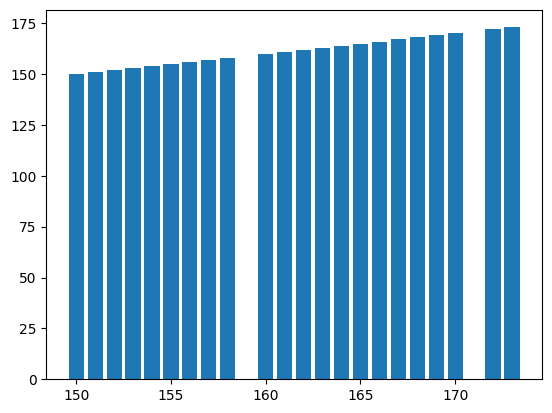

In [ ]:
# Observando graficamente
plt.bar(dados, dados);

## **Número de classes**

A Regra de Sturges é uma abordagem comum para determinar o número ideal de classes em uma distribuição de frequência para a construção de histogramas. Essa regra é baseada no tamanho da amostra e busca equilibrar a representatividade da distribuição sem gerar um excesso de classes.

- Fórmula: $ k = 1 + 3.322 \cdot \log_{10}(n) $ (onde k é o número recomendado de classes e n é o tamanho da amostra.)


In [ ]:
# Obtendo o tamanho da amostra
n = len(dados)

Ao aplicar a fórmula é necessario arredondar o valor, por isso é necessario aplicar a função 'round' na fórmula.

In [ ]:
# Aplicando a fórmula
k = (1 + 3.3 * np.log10(n)).round()

print(f"O número de classes é {k}")

O número de classes é 6.0


## **Amplitude amostral (AA)**

**Amplitude Amostral:**
A amplitude amostral $(AA)$ é uma medida que representa a extensão total dos dados em um conjunto, calculada subtraindo o menor valor observado $(X_{\text{mínimo}}$) do maior valor observado $(X_{\text{máximo}}$).


Amplitude Amostral $(A) = X_{\text{máximo}} - X_{\text{mínimo}}$


In [ ]:
# Calculando a amplitude do intervalo
amplitude_amostral = max(dados) - min(dados)


# Exibindo o resultado
print(f"Amplitude do amostral: {amplitude_amostral}")

Amplitude do amostral: 23


## **Amplitude do intervalo de classe**

A amplitude do intervalo de classe é uma medida estatística que representa a largura de cada intervalo em uma distribuição de frequência.

In [ ]:
# Calculando a amplitude do intervalo de classe
h = amplitude_amostral / k

# Arrendondando o valor para cima
h = math.ceil(h)

# Exibindo a amplitude do intervalo de classe
print(f"A amplitude do intervalo de classe é: {h}")

A amplitude do intervalo de classe é: 4


Agora que já possuímos a amplitude amostral, a amplitude do intervalo e o número de classes, podemos prosseguir com a construção da distribuição de frequência.

## **Construção da distribuição**

Para a construção da distribuição propriamente dita, podemos utilizar uma abordagem um pouco mais manual, usando listas e loops. Alternativamente, podemos simplesmente utilizar bibliotecas que nos auxiliam nessa tarefa. Vamos explorar ambas as abordagens.

### *Construção manual*

Primeiro, vamos criar um intervalo. Para isso, utilizamos a função do NumPy chamada `arange`. Passamos como argumento o menor valor, que neste caso é 150, e o maior valor, que é 173. No entanto, devido ao nosso 'step', esta função pegaria o último valor - 1. Por isso, adicionamos +2. Dessa forma, a função abrange todos os valores, e 'h' refere-se ao intervalo de uma classe para outra.

In [ ]:
# Criando os intervalos
intervalos = np.arange(minimo, maximo + 2, step = h)

# Observando os valores
intervalos

array([150, 154, 158, 162, 166, 170])

Criando um bloco condicional dentro de um loop para realizar a contagem de cada uma das frequências nas suas respectivas classes.

In [ ]:
intervalo1, intervalo2, intervalo3, intervalo4, intervalo5, intervalo6 = 0,0,0,0,0,0
for i in range(n):
  if dados[i] >= intervalos[0] and dados[i] < intervalos[1]:
    intervalo1 += 1
  elif dados[i] >= intervalos[1] and dados[i] < intervalos[2]:
    intervalo2 += 1
  elif dados[i] >= intervalos[2] and dados[i] < intervalos[3]:
    intervalo3 += 1
  elif dados[i] >= intervalos[3] and dados[i] < intervalos[4]:
    intervalo4 += 1
  elif dados[i] >= intervalos[4] and dados[i] < intervalos[5]:
    intervalo5 += 1
  elif dados[i] >= intervalos[5] and dados[i] < intervalos[6]:
    intervalo6 += 1

Incrementando todos os valores da contagem da frequência em uma lista.

In [ ]:
# Criando a lista
lista_intervalos = []
lista_intervalos.append(intervalo1)
lista_intervalos.append(intervalo2)
lista_intervalos.append(intervalo3)
lista_intervalos.append(intervalo4)
lista_intervalos.append(intervalo5)
lista_intervalos.append(intervalo6)
lista_intervalos

[5, 9, 11, 7, 5, 3]

Criando uma e percorrendo os valores presentes na 'lista_intervalos' e concatenando com os valores dos intervalos criados logo acima.

In [ ]:
# Criando a lista
lista_classes = []

# Criando um laço de repetição
for i in range(len(lista_intervalos)):
  lista_classes.append(str(intervalos[i]) + '-' + str(intervalos[i + 1]))

In [ ]:
# Observando a lista
lista_classes

['150-154', '154-158', '158-162', '162-166', '166-170', '170-174']

Gerando a visualização da distribuição de frequência criada manualmente.

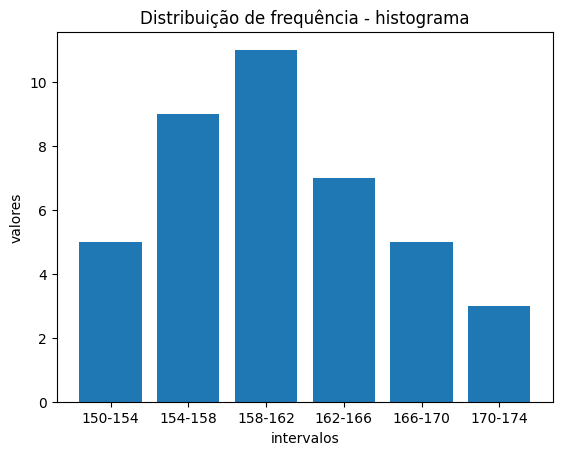

In [ ]:
plt.bar(lista_classes, lista_intervalos)
plt.title('Distribuição de frequência - histograma')
plt.xlabel('intervalos')
plt.ylabel('valores');

Observar uma distribuição dessa forma é bem mais agradável; no entanto, a construção ficou um pouco trabalhosa, por assim dizer. Dito isso, vamos para uma criação utilizando as bibliotecas disponíveis.

### *Histograma com numpy e matplotlib*

Recriando os mesmos dados utilizados acima.

In [ ]:
# Criando uma tabela primitiva
dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

Agora, criamos duas variáveis chamadas 'frequencia' e 'classes', onde está sendo armazenada a função histograma do numpy. Essa função recebe como parâmetros os dados, e o parâmetro 'bins' refere-se ao intervalo de classes. Nele, foi passado como parâmetro o 'sturges', que foi a técnica utilizada acima para calcular a amplitude do intervalo de classe.







In [ ]:
# Criando a distribuição de frequência
frequencia, classes = np.histogram(dados, bins = 'sturges')


# Observando os valores das classes e da distribuição
frequencia, classes

(array([ 5,  8,  3, 12,  5,  4,  3]),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]))

Podemos observar uma pequena diferença nos intervalos de classes. Muito provavelmente, isso ocorreu porque, ao calcularmos o número de classes, arredondamos o valor para baixo, obtendo assim o valor 6. Caso não tivéssemos arredondado, o valor teria sido aproximadamente 6,28.

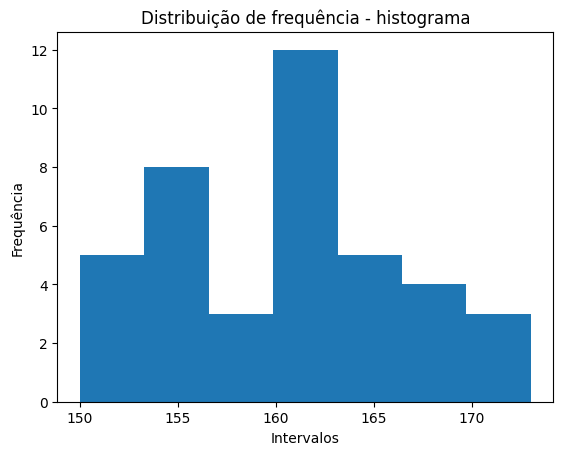

In [ ]:
# Gerando a visualização
plt.hist(dados, classes)
plt.title('Distribuição de frequência - histograma')
plt.xlabel('Intervalos')
plt.ylabel('Frequência');

Podemos observar uma semelhança na visualização. Conseguimos atingir um resultado bem semelhante utilizando bem menos linhas de código, o que pode tornar essa solução bem mais viável.

### *Distribuição de frequência com pandas e seaborn*

Esse método será utilizado para a criação de distribuição em dados no formato de um DataFrame, por exemplo.

In [ ]:
# Observando o tipo do dado
type(dados)

numpy.ndarray

Observamos, desta forma, que até agora estávamos trabalhando com dados no formato NumPy.







In [ ]:
# Convertendo os dados para um Data Frame
df = pd.DataFrame({'dados': dados})

# Observando os valores
df.head()

,dados
0,160
1,165
2,167
3,164
4,160


Criando a Distribuição

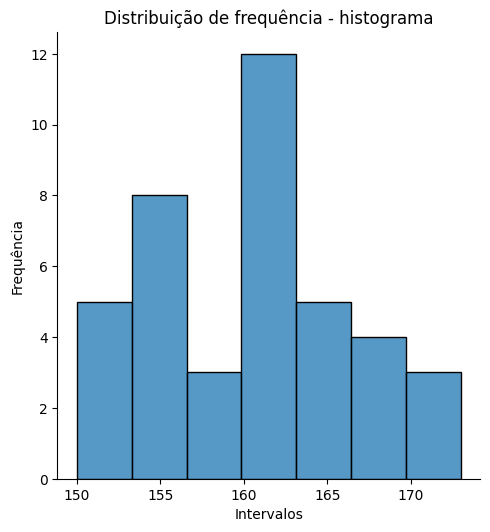

In [ ]:
# Exibindo a distribuição
sns.displot(data = dados)
plt.title('Distribuição de frequência - histograma')
plt.xlabel('Intervalos')
plt.ylabel('Frequência');

Podemos observar agora um gráfico bastante semelhante aos exemplos anteriores, porém com um formato diferente para representar os dados.

## **Desafio**

O objetivo desta tarefa é aplicar a distribuição de frequência utilizando o atributo age da base de dados do censo

- Carregue a base de dados census.csv

- Faça testes utilizando o parâmetro bins para visualizar a distribuição dos dados

### **Carregando os dados**

In [ ]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Realizando as importações pertinentes*

In [ ]:
# Manipulação de arquivos
import pandas as pd

# Funções matemáticas
import numpy as np

# Biblioteca para visualização de dados
import seaborn as sns

# Biblioteca para visualização de dados
import matplotlib.pyplot as plt

*Realizando a importação do DataFrame*

In [ ]:
# Importando o dataset
df = pd.read_csv("/content/drive/MyDrive/Estatística para ciência de dados/census.csv")

In [ ]:
# Observando os dados
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **Criando a distribuição**

O desafio proposto é realizar uma distribuição de frequência na coluna 'age', então utilizaremos apenas ela e chamaremos uma função do matplotlib para gerar o gráfico.

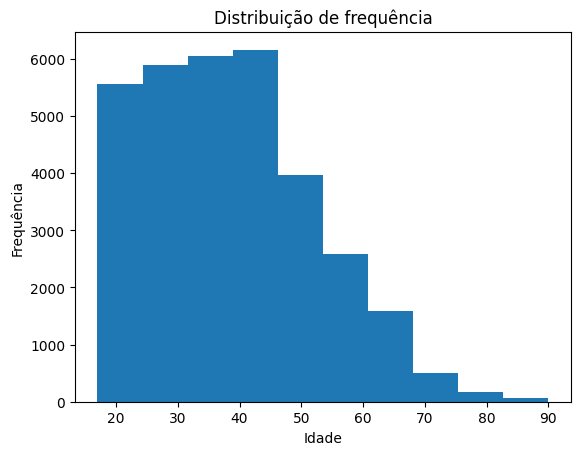

In [ ]:
# Gerando o gráfico
df['age'].plot.hist()

# Adicionando o título
plt.title('Distribuição de Idade')

# Adicionando um rótulo ao eixo x do gráfico
plt.xlabel('Idade')

# Adicionando um rótulo ao eixo y do gráfico
plt.ylabel('Frequência');

*Gerando um gráfico semelhante usando o seaborn*

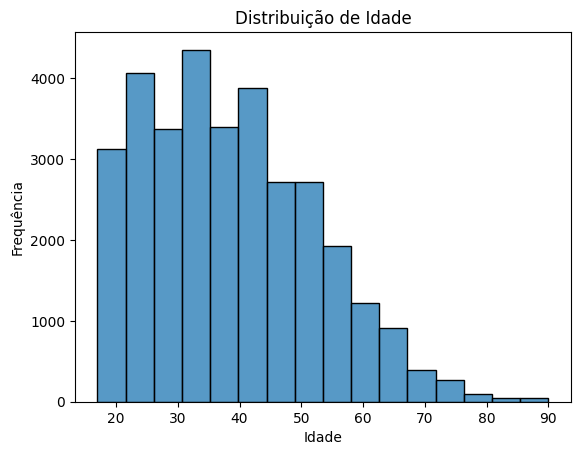

In [ ]:
# Gerando o gráfico
sns.histplot(df['age'], kde=False, bins = 'sturges')

# Adicionando o título
plt.title('Distribuição de Idade')

# Adicionando um rótulo ao eixo x do gráfico
plt.xlabel('Idade')

# Adicionando um rótulo ao eixo y do gráfico
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()

**Criamos uma distribuição utilizando parâmetros já predefinidos pelas funções que utilizamos, mas e se fosse necessário definirmos os intervalos manualmente?**

Para este caso, iremos segmentar os dados em intervalos específicos. Vamos definir os limites dos intervalos e atribuir rótulos às categorias. Por exemplo, se um valor estiver no intervalo [25, 40), será rotulado como "25-40". É importante frisar que todos esses procedimentos estão sendo armazenados em uma nova coluna chamada 'Faixa etária'.

In [ ]:
# Segmentamdo os dados em intervalos específicos.
df['Faixa etária'] = pd.cut(df['age'],
                   # Definindo os limite de intervalos
                   bins=[0, 18, 25, 40, 60, 90],
                   # Adinionando rótulos a categoria
                   labels=['0-18', "18-25", "25-40", "40-60", "60-90"])

In [ ]:
# Observando os dados
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,Faixa etária
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,25-40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,40-60
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,25-40
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-60
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,25-40


Podemos confirmar a presença da nossa nova coluna. Agora, é o momento de criar o histograma de frequência.

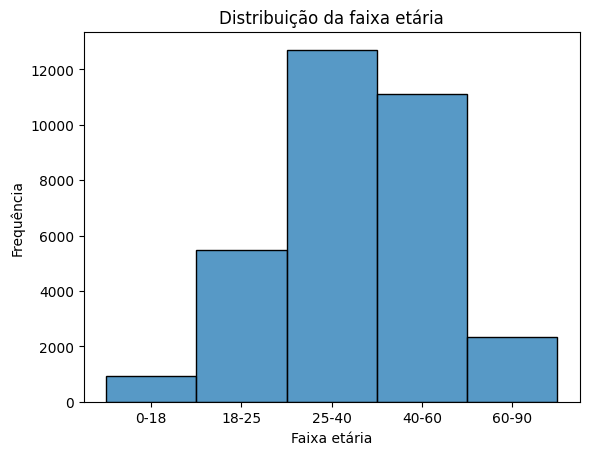

In [ ]:
# Gerando o gráfico
sns.histplot(df['Faixa etária'], kde=False)

# Adicionando o título
plt.title('Distribuição da faixa etária')

# Adicionando um rótulo ao eixo y do gráfico
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()

### Conclusão

Utilizando diferentes técnicas, foi possível atingir resultados distintos. Essa abordagem demonstra flexibilidade e capacidade de se adequar a diferentes situações.